In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
from sklearn import preprocessing

## 변수(feature, variable)	정의	설명	타입
- survival	생존여부	target label 임. 1, 0 으로 표현됨	integer
- Pclass	티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	integer
- sex	성별	male, female 로 구분되며 binary	string
- Age	나이	continuous	integer
- sibSp	함께 탑승한 형제와 배우자의 수	quantitative	integer
- parch	함께 탑승한 부모, 아이의 수	quantitative	integer
- ticket	티켓 번호	alphabat + integer	string
- fare	탑승료	continuous	float
- cabin	객실 번호	alphabat + integer	string
- embared	탑승 항구	C = Cherbourg, Q = Queenstown, S = Southampton	string

In [3]:
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


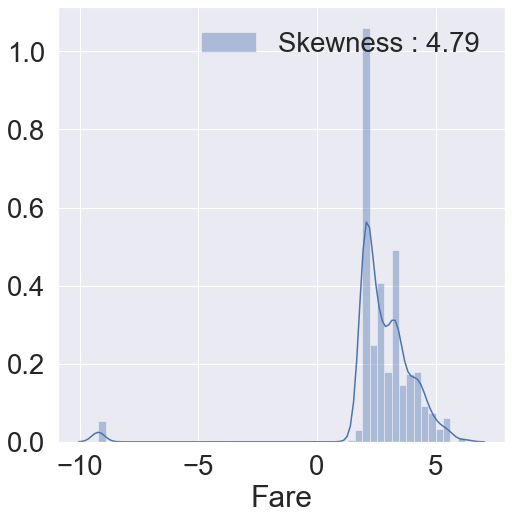

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(np.log(df_train['Fare']+10e-5), color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [30]:
df_test['Fare'].isna().sum()

1

In [32]:
df_test['Fare'] = df_test['Fare'].fillna(0)

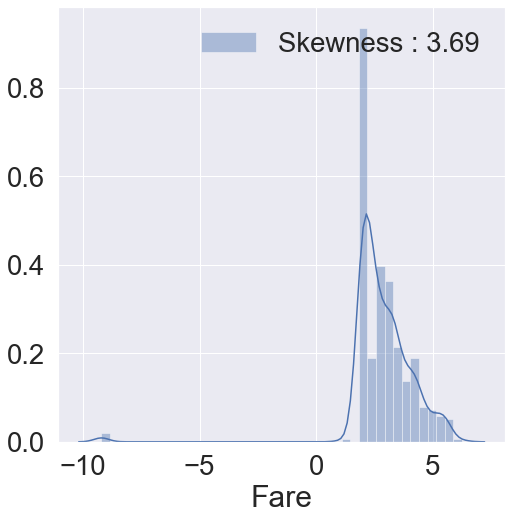

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(np.log(df_test['Fare']+10e-5), color='b', label='Skewness : {:.2f}'.format(float(df_test['Fare'].skew())), ax=ax)
g = g.legend(loc='best')

In [34]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

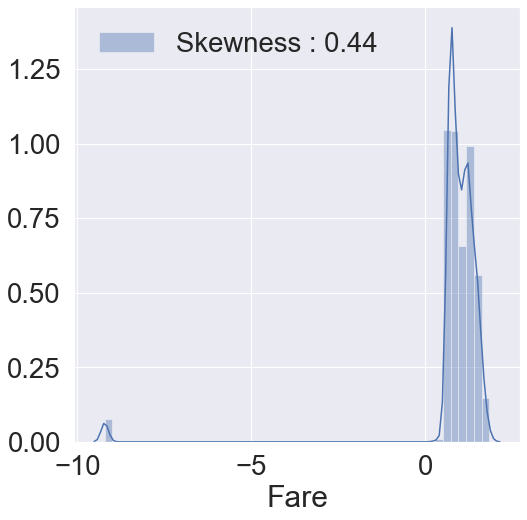

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(np.log(df_train['Fare']+10e-5), color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

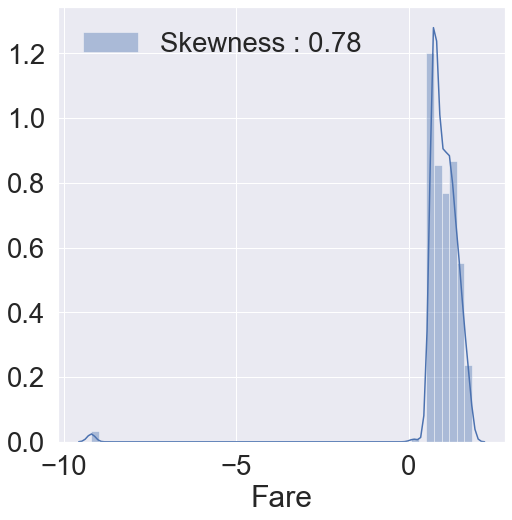

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(np.log(df_test['Fare']+10e-5), color='b', label='Skewness : {:.2f}'.format(float(df_test['Fare'].skew())), ax=ax)
g = g.legend(loc='best')